## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
dropped_df = application_df.drop(["EIN", "NAME"], axis=1)
dropped_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
dropped_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_types = dropped_df["APPLICATION_TYPE"].value_counts()

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_types[app_types < 1000].index)

# Replace in dataframe
for app in application_types_to_replace:
    dropped_df['APPLICATION_TYPE'] = dropped_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
dropped_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
class_types = dropped_df["CLASSIFICATION"].value_counts()
class_types

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
dropped_df['CLASSIFICATION'].value_counts().loc[lambda x : x >1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_types[class_types < 2000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    dropped_df['CLASSIFICATION'] = dropped_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
dropped_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: count, dtype: int64

In [9]:
dropped_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,Other,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,Other,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_df = pd.get_dummies(dropped_df)
dummy_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [11]:
len(dummy_df.columns)

39

In [12]:
# Split our preprocessed data into our features and target arrays
y = dummy_df["IS_SUCCESSFUL"]
X = dummy_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
len(X_train_scaled)

25724

## Compile, Train and Evaluate the Model (ATTEMPT 1)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer1 = 10
layer2 = 10
layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="tanh", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="tanh"))

# # 3rd layer for testing
# nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                390       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 511 (2.00 KB)
Trainable params: 511 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 506us/step - loss: 0.5985 - accuracy: 0.6994
Epoch 2/100
804/804 [==============================] - 0s 520us/step - loss: 0.5713 - accuracy: 0.7249
Epoch 3/100
804/804 [==============================] - 0s 476us/step - loss: 0.5663 - accuracy: 0.7271
Epoch 4/100
804/804 [==============================] - 0s 487us/step - loss: 0.5644 - accuracy: 0.7280
Epoch 5/100
804/804 [==============================] - 0s 452us/step - loss: 0.5629 - accuracy: 0.7284
Epoch 6/100
804/804 [==============================] - 0s 448us/step - loss: 0.5614 - accuracy: 0.7297
Epoch 7/100
804/804 [==============================] - 0s 455us/step - loss: 0.5606 - accuracy: 0.7294
Epoch 8/100
804/804 [==============================] - 0s 452us/step - loss: 0.5596 - accuracy: 0.7304
Epoch 9/100
804/804 [==============================] - 0s 451us/step - loss: 0.5592 - accuracy: 0.7298
Epoch 10/100
804/804 [==============================] - 0s 455us/step - l

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5600 - accuracy: 0.7224 - 153ms/epoch - 570us/step
Loss: 0.5599623918533325, Accuracy: 0.722449004650116


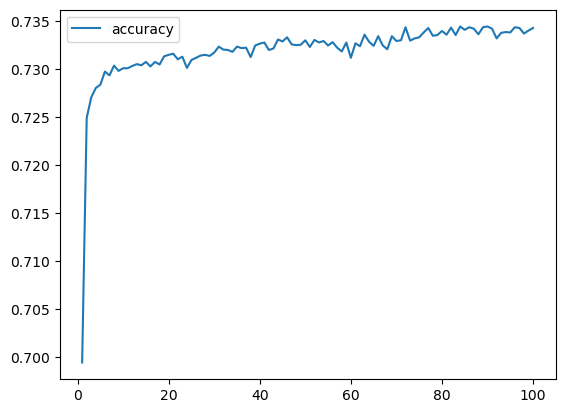

In [19]:
import matplotlib.pyplot as plt

model_df = pd.DataFrame(fit_model.history)
model_df.index += 1
model_df.plot(y="accuracy")
plt.show()

# 2ND ATTEMPT

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])
layer1 = 100
layer2 = 75
layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# 3rd layer for testing
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3900      
                                                                 
 dense_4 (Dense)             (None, 75)                7575      
                                                                 
 dense_5 (Dense)             (None, 30)                2280      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 13786 (53.85 KB)
Trainable params: 13786 (53.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 659us/step - loss: 0.5743 - accuracy: 0.7190
Epoch 2/100
804/804 [==============================] - 1s 727us/step - loss: 0.5623 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 663us/step - loss: 0.5598 - accuracy: 0.7283
Epoch 4/100
804/804 [==============================] - 1s 634us/step - loss: 0.5586 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 1s 627us/step - loss: 0.5575 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 1s 627us/step - loss: 0.5566 - accuracy: 0.7315
Epoch 7/100
804/804 [==============================] - 1s 628us/step - loss: 0.5559 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 631us/step - loss: 0.5550 - accuracy: 0.7324
Epoch 9/100
804/804 [==============================] - 1s 658us/step - loss: 0.5545 - accuracy: 0.7326
Epoch 10/100
804/804 [==============================] - 1s 630us/step - l

In [23]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5718 - accuracy: 0.7235 - 150ms/epoch - 559us/step
Loss: 0.5717683434486389, Accuracy: 0.723498523235321


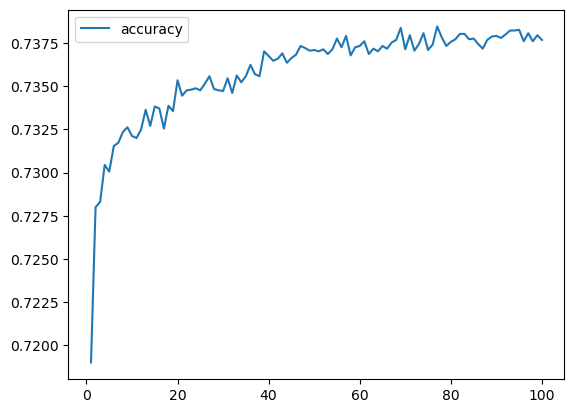

In [24]:
model_df = pd.DataFrame(fit_model.history)
model_df.index += 1
model_df.plot(y="accuracy")
plt.show()

# 3RD ATTEMPT

In [28]:
# Attempt to change amount of bins

classifications_to_replace = list(class_types[class_types < 5000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    dropped_df['CLASSIFICATION'] = dropped_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
dropped_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
Other    10899
C2000     6074
Name: count, dtype: int64

In [29]:
application_types_to_replace = list(app_types[app_types < 1500].index)

# Replace in dataframe
for app in application_types_to_replace:
    dropped_df['APPLICATION_TYPE'] = dropped_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
dropped_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     5720
T4        1542
Name: count, dtype: int64

In [30]:
dummy_df = pd.get_dummies(dropped_df)

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [32]:
y = dummy_df["IS_SUCCESSFUL"]
X = dummy_df.drop("IS_SUCCESSFUL", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Using same perameters as attempt 2 with less bins

num_features = len(X_train_scaled[0])
layer1 = 100
layer2 = 75
layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, activation="relu", input_dim=num_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# 3rd layer for testing
nn.add(tf.keras.layers.Dense(units=layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               3500      
                                                                 
 dense_8 (Dense)             (None, 75)                7575      
                                                                 
 dense_9 (Dense)             (None, 30)                2280      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 13386 (52.29 KB)
Trainable params: 13386 (52.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# compile and fit the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 650us/step - loss: 0.5855 - accuracy: 0.7140
Epoch 2/100
804/804 [==============================] - 1s 684us/step - loss: 0.5739 - accuracy: 0.7204
Epoch 3/100
804/804 [==============================] - 1s 641us/step - loss: 0.5716 - accuracy: 0.7223
Epoch 4/100
804/804 [==============================] - 1s 646us/step - loss: 0.5701 - accuracy: 0.7220
Epoch 5/100
804/804 [==============================] - 1s 644us/step - loss: 0.5694 - accuracy: 0.7231
Epoch 6/100
804/804 [==============================] - 1s 637us/step - loss: 0.5693 - accuracy: 0.7229
Epoch 7/100
804/804 [==============================] - 1s 663us/step - loss: 0.5684 - accuracy: 0.7229
Epoch 8/100
804/804 [==============================] - 1s 640us/step - loss: 0.5677 - accuracy: 0.7253
Epoch 9/100
804/804 [==============================] - 1s 641us/step - loss: 0.5674 - accuracy: 0.7255
Epoch 10/100
804/804 [==============================] - 1s 638us/step - l

# Save model 

In [36]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

/opt/homebrew/Caskroom/miniconda/base/envs/RUTDataViz2023/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
